In [3]:
import numpy as np
import pandas as pd
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from fastai.structured import *
import matplotlib.pyplot as plt
import os
import glob

from numpy import nan as Nan

In [2]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
all_files = glob.glob("*.csv")

In [6]:
#Read all csv files

li = []
for filename in all_files:
    df = pd.read_csv(filename, sep=',', header=1, low_memory=False) #read csv
    li.append(df)

In [7]:
crypto_data = pd.concat(li, axis=0, ignore_index=True)

In [8]:
crypto_data = crypto_data.drop(columns=['Unix Timestamp'])

In [9]:
crypto_data.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2019-04-04 00:00:00,BTCUSD,4976.94,4977.20,4939.53,4940.89,17.553291
1,2019-04-03 23:00:00,BTCUSD,5113.50,5113.50,4800.00,4976.94,2331.356847
2,2019-04-03 22:00:00,BTCUSD,5188.41,5266.70,4975.00,5113.50,1632.587373
3,2019-04-03 21:00:00,BTCUSD,5293.76,5346.68,5180.04,5188.41,350.507383
4,2019-04-03 20:00:00,BTCUSD,5140.62,5319.81,5140.62,5293.76,1005.936609


In [10]:
crypto_data['Date'] = pd.to_datetime(crypto_data['Date'])
#crypto_data['Date'] = pd.to_numeric(crypto_data['Date'])

C:\Users\Marcin\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


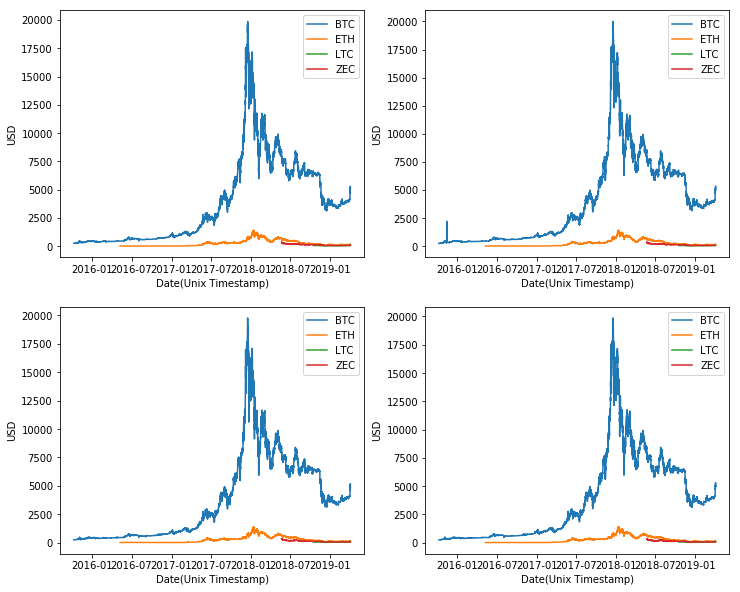

In [11]:
#btc - 30563
#eth - 55991
#ltc - 60059
#zec - 67655

fig = plt.figure(1, figsize=(12,10))
for i in range(2, 6):
    tmp_fig = fig.add_subplot(2,2,i-1)
    plt.plot(crypto_data.iloc[:30563, 0], crypto_data.iloc[:30563, i], label="BTC") #Open
    plt.plot(crypto_data.iloc[30564:55991, 0], crypto_data.iloc[30564:55991, i], label="ETH")
    plt.plot(crypto_data.iloc[55992:60059, 0], crypto_data.iloc[55992:60059, i], label="LTC")
    plt.plot(crypto_data.iloc[60060:67655, 0], crypto_data.iloc[60060:67655, i], label="ZEC")
    plt.legend()
    plt.ylabel('USD')
    plt.xlabel('Date(Unix Timestamp)')

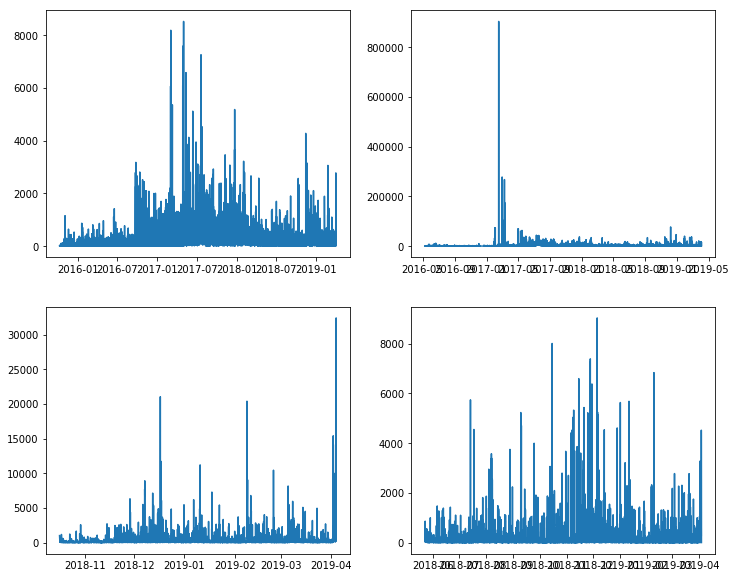

In [12]:
fig = plt.figure(1, figsize=(12,10))

tmp_fig = fig.add_subplot(2,2,1)
plt.plot(crypto_data.iloc[:30563, 0], crypto_data.iloc[:30563, 6], label="BTC") #Open
tmp_fig = fig.add_subplot(2,2,2)
plt.plot(crypto_data.iloc[30564:55991, 0], crypto_data.iloc[30564:55991, 6], label="ETH")
tmp_fig = fig.add_subplot(2,2,3)
plt.plot(crypto_data.iloc[55992:60059, 0], crypto_data.iloc[55992:60059, 6], label="LTC")
tmp_fig = fig.add_subplot(2,2,4)
plt.plot(crypto_data.iloc[60060:67655, 0], crypto_data.iloc[60060:67655, 6], label="ZEC")

In [13]:
crypto_data.dtypes

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [14]:
crypto_data.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2019-04-04 00:00:00,BTCUSD,4976.94,4977.20,4939.53,4940.89,17.553291
1,2019-04-03 23:00:00,BTCUSD,5113.50,5113.50,4800.00,4976.94,2331.356847
2,2019-04-03 22:00:00,BTCUSD,5188.41,5266.70,4975.00,5113.50,1632.587373
3,2019-04-03 21:00:00,BTCUSD,5293.76,5346.68,5180.04,5188.41,350.507383
4,2019-04-03 20:00:00,BTCUSD,5140.62,5319.81,5140.62,5293.76,1005.936609


In [15]:
crypto_data['Symbol'].value_counts()

BTCUSD    30564
ETHUSD    25428
ZECUSD     7596
LTCUSD     4068
Name: Symbol, dtype: int64

In [16]:
df_btc = crypto_data[crypto_data['Symbol'] == 'BTCUSD']

# Creating new df with 841 columns to put into the model, also named it properly 

In [18]:
df_btc.drop(['Symbol'], axis=1, inplace=True, errors='ignore')
df_btc.head()

C:\Users\Marcin\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Date,Open,High,Low,Close,Volume
0,2019-04-04 00:00:00,4976.94,4977.20,4939.53,4940.89,17.553291
1,2019-04-03 23:00:00,5113.50,5113.50,4800.00,4976.94,2331.356847
2,2019-04-03 22:00:00,5188.41,5266.70,4975.00,5113.50,1632.587373
3,2019-04-03 21:00:00,5293.76,5346.68,5180.04,5188.41,350.507383
4,2019-04-03 20:00:00,5140.62,5319.81,5140.62,5293.76,1005.936609


In [19]:
df_btc = df_btc.sort_values(by=['Date'], ascending=True)
df_btc = df_btc[df_btc.Date.dt.date > datetime.date(2015, 10, 8)]
df_btc = df_btc[df_btc.Date.dt.date < datetime.date(2019, 4, 4)]
df_btc.head()

,Date,Open,High,Low,Close,Volume
30552,2015-10-09 00:00:00,243.95,243.95,243.6,243.6,3.0
30551,2015-10-09 01:00:00,243.60,243.60,243.6,243.6,0.0
30550,2015-10-09 02:00:00,243.60,243.60,243.6,243.6,0.0
30549,2015-10-09 03:00:00,243.60,243.60,243.6,243.6,0.0
30548,2015-10-09 04:00:00,243.60,243.60,243.6,243.6,0.0


In [20]:
# reset index to 0,1,2,...
df_btc = df_btc.reset_index(drop = True)

In [21]:
#create empty df
df_dayrow = pd.DataFrame()

for index, row in df_btc.iterrows():
   #add to empty df one row with 24 columns
    df_tmp = df_btc.iloc[index:index+24]
    df_tmp = pd.DataFrame(df_tmp[['Open', 'High', 'Low', 'Close', 'Volume']].values.reshape(1, -1))
    df_tmp['Date'] = row.Date
    df_tmp['Open_X'] = df_btc.iloc[index+24][1]
    df_dayrow = df_dayrow.append(df_tmp, ignore_index=True)
    
    #if index is 24 from the end break
    if index == df_btc[-25:-24].index:
        break
        
   # get this row and its 23 next rows
   # put them together as one row
   # add the created row to the df_dayrow

In [22]:
df_dayrow.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,Date,Open_X
0,243.95,243.95,243.6,243.6,3.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.39,0.000000,245.39,245.39,245.39,245.39,0.000800,2015-10-09 00:00:00,245.39
1,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.39,0.000800,245.39,245.39,245.39,245.39,0.000000,2015-10-09 01:00:00,245.39
2,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.39,0.000000,245.39,245.54,245.39,245.54,8.119227,2015-10-09 02:00:00,245.54
3,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.54,8.119227,245.54,245.54,245.51,245.51,0.440000,2015-10-09 03:00:00,245.51
4,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.51,245.51,0.440000,245.51,245.51,245.51,245.51,0.000000,2015-10-09 04:00:00,245.51


In [23]:
#create colnames_li(list) with column names 
colname=['Open', 'High', 'Low', 'Close', 'Volume']
colnames_li=[]
for i in range(24):
    for col in colname:
        col_names= [col + '_H_' + str(i)]
        #print(col_names)
        colnames_li.append(col_names)\

#change column names from colnames_li(list)
for j in range(len(df_dayrow.columns)-2):
    df_dayrow.columns.values[j] = colnames_li[j][0]

In [24]:
df_dayrow.to_pickle("./df_dayrow.pkl")

In [25]:
df_dayrow = pd.read_pickle("./df_dayrow.pkl")

In [26]:
df_dayrow.drop(['Close_H_23'], axis=1, inplace=True, errors='ignore')

In [51]:
df_dayrow.head()

,Open_H_0,High_H_0,Low_H_0,Close_H_0,Volume_H_0,Open_H_1,High_H_1,Low_H_1,Close_H_1,Volume_H_1,...,High_H_22,Low_H_22,Close_H_22,Volume_H_22,Open_H_23,High_H_23,Low_H_23,Volume_H_23,Date,Open_X
0,243.95,243.95,243.6,243.6,3.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.39,245.39,0.000000,245.39,245.39,245.39,0.000800,2015-10-09 00:00:00,245.39
1,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.39,245.39,0.000800,245.39,245.39,245.39,0.000000,2015-10-09 01:00:00,245.39
2,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.39,245.39,245.39,0.000000,245.39,245.54,245.39,8.119227,2015-10-09 02:00:00,245.54
3,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.54,245.39,245.54,8.119227,245.54,245.54,245.51,0.440000,2015-10-09 03:00:00,245.51
4,243.60,243.60,243.6,243.6,0.0,243.6,243.6,243.6,243.6,0.0,...,245.54,245.51,245.51,0.440000,245.51,245.51,245.51,0.000000,2015-10-09 04:00:00,245.51


In [27]:
#drop all columns exept volume
df_volume = df_dayrow[df_dayrow.columns.drop(list(df_dayrow.filter(regex='Open')))]
df_volume = df_volume[df_volume.columns.drop(list(df_volume.filter(regex='Close')))]
df_volume = df_volume[df_volume.columns.drop(list(df_volume.filter(regex='High')))]
df_volume = df_volume[df_volume.columns.drop(list(df_volume.filter(regex='Low')))]

In [31]:
for i in range( len(df_volume)-1):
    df_volume.loc[i, 'Volume_X'] = df_volume.iloc[i+1][23]

In [32]:
df_volume.drop(df_volume.index[30527], inplace=True)

In [33]:
df_volume

,Volume_H_0,Volume_H_1,Volume_H_2,Volume_H_3,Volume_H_4,Volume_H_5,Volume_H_6,Volume_H_7,Volume_H_8,Volume_H_9,...,Volume_H_16,Volume_H_17,Volume_H_18,Volume_H_19,Volume_H_20,Volume_H_21,Volume_H_22,Volume_H_23,Date,Volume_X
0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.229184,0.000000,3.433441,35.687917,4.531416,0.000000,0.000800,2015-10-09 00:00:00,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.229184,0.000000,3.433441,35.687917,4.531416,0.000000,0.000800,0.000000,2015-10-09 01:00:00,8.119227
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,3.433441,35.687917,4.531416,0.000000,0.000800,0.000000,8.119227,2015-10-09 02:00:00,0.440000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,3.433441,35.687917,4.531416,0.000000,0.000800,0.000000,8.119227,0.440000,2015-10-09 03:00:00,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.973254,...,35.687917,4.531416,0.000000,0.000800,0.000000,8.119227,0.440000,0.000000,2015-10-09 04:00:00,15.974476
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.973254,4.171829,...,4.531416,0.000000,0.000800,0.000000,8.119227,0.440000,0.000000,15.974476,2015-10-09 05:00:00,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.973254,4.171829,0.000000,...,0.000000,0.000800,0.000000,8.119227,0.440000,0.000000,15.974476,0.000000,2015-10-09 06:00:00,0.000000
7,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.973254,4.171829,0.000000,0.000000,...,0.000800,0.000000,8.119227,0.440000,0.000000,15.974476,0.000000,0.000000,2015-10-09 07:00:00,0.000000
8,0.000000,0.000000,0.000000,1.000000,0.000000,3.973254,4.171829,0.000000,0.000000,0.229184,...,0.000000,8.119227,0.440000,0.000000,15.974476,0.000000,0.000000,0.000000,2015-10-09 08:00:00,0.000000
9,0.000000,0.000000,1.000000,0.000000,3.973254,4.171829,0.000000,0.000000,0.229184,0.000000,...,8.119227,0.440000,0.000000,15.974476,0.000000,0.000000,0.000000,0.000000,2015-10-09 09:00:00,0.000000


In [34]:
a = df_volume.copy()
a['Date'] = pd.to_numeric(a['Date'], errors='coerce')


In [35]:
df, y ,nas = proc_df(a, 'Volume_X')

In [36]:
df.columns

Index(['Volume_H_0', 'Volume_H_1', 'Volume_H_2', 'Volume_H_3', 'Volume_H_4',
       'Volume_H_5', 'Volume_H_6', 'Volume_H_7', 'Volume_H_8', 'Volume_H_9',
       'Volume_H_10', 'Volume_H_11', 'Volume_H_12', 'Volume_H_13',
       'Volume_H_14', 'Volume_H_15', 'Volume_H_16', 'Volume_H_17',
       'Volume_H_18', 'Volume_H_19', 'Volume_H_20', 'Volume_H_21',
       'Volume_H_22', 'Volume_H_23', 'Date'],
      dtype='object')

In [37]:
y

array([   0.     ,    8.11923,    0.44   , ..., 1005.93661,  350.50738, 1632.58737])

In [38]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 2000 #size of validation
n_trn = len(df)-n_valid #traing size
raw_train, raw_valid = split_vals(df_volume, n_trn) 
X_train, X_valid = split_vals(df, n_trn) #split traing data to train and validation data
y_train, y_valid = split_vals(y, n_trn) #split test to test and valid

X_train.shape, y_train.shape, X_valid.shape

((28527, 25), (28527,), (2000, 25))

In [39]:
y_train[-1:]

array([93.88562])

In [40]:
y_valid

array([ 176.69183, 1735.38473,  307.87059, ..., 1005.93661,  350.50738, 1632.58737])

In [41]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [ ]:
objective functions
sklearn, regresia

In [42]:
m = RandomForestRegressor(n_jobs=-1) #njobs=-1 take all cores form your processor
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 1.34 s
[117.84167860748796, 358.67395630303565, 0.8743310530645966, -3.199937983880237]


In [43]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1) #njobs=-1 take all cores form your processor
m.fit(X_train, y_train)
print_score(m)

[267.6903273467086, 177.48347263391256, 0.3515216326932986, -0.02839279723619903]


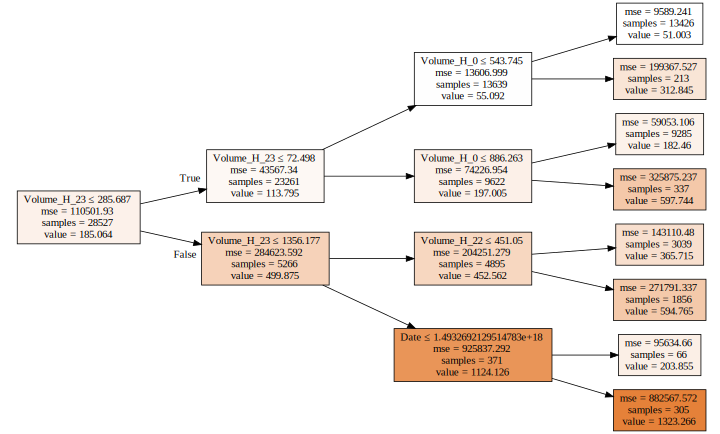

In [44]:
draw_tree(m.estimators_[0], df, precision=3)

In [45]:
m = RandomForestRegressor(n_jobs=-1) 
m.fit(X_train, y_train)  
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[114.91494241336919, 242.74643518503936, 0.8804958071573069, -0.9237512406508566]


In [46]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]
#preds take first row and print first predictions
#mean of first predictions
#actual predict   

(array([ 293.88326,  158.31776,  419.65407,   88.5185 ,  147.52351,  153.60331, 1678.63001,  649.93164,
          57.81826,   96.88035]), 374.47606902066, 176.69182551080002)

In [270]:
preds.shape

(10, 2000)

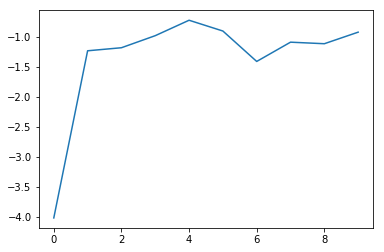

In [47]:
#plot  r2 score, going through each tree and take mean  
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [48]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[99.26992926939698, 289.32051614748394, 0.9108203917429424, -1.732761015695758, 0.34947432679609036]


In [49]:
df_trn, y_trn, nas = proc_df(a, 'Volume_X')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [50]:
len(X_train)

28527

In [1]:
import tensorflow as tf